In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Ayushi0214/Customer-Churn-analysis/refs/heads/main/Customer%20Churn.csv")

In [10]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#there are blank spaces in total charges column so we have to fill them 
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")

In [12]:
#now change the datatype of total charges from obeject to float
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.duplicated().sum()

0

In [16]:
df['customerID'].duplicated().sum()

0

In [3]:
#convert senior citizen value 0 & 1 to yes or no 
def cov(values):
    if values == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(cov)

1] to count of churn (still take our service or not ) yes = churn,no=still take service 

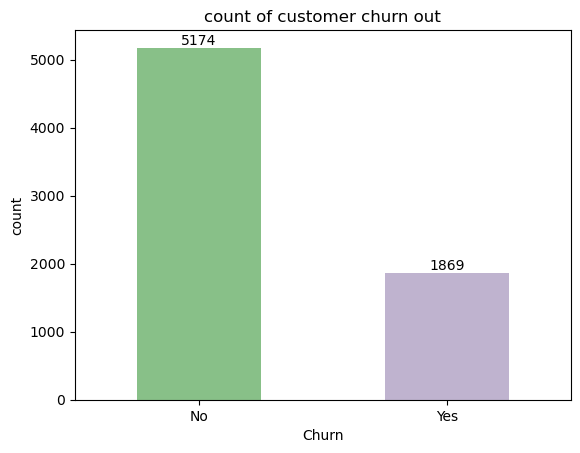

In [35]:
ax = sns.countplot(x='Churn',data=df,hue='Churn',palette='Accent',width=0.5)
plt.title("count of customer churn out")

for bars in ax.containers:
 ax.bar_label(bars)
plt.show()

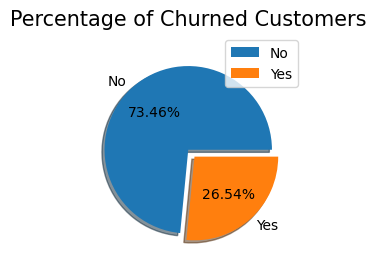

In [60]:
#percentage of churn customer
ex = [0.0,0.1]
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'],data=df,labels=gb.index,autopct='%1.2f%%',shadow=True,radius=0.9,explode=ex)
plt.title("Percentage of Churned Customers",fontsize=15)
plt.legend()
plt.show()

Here by above charts we can conclude that around 26.54% people choun out . Now let's the reason behind it 

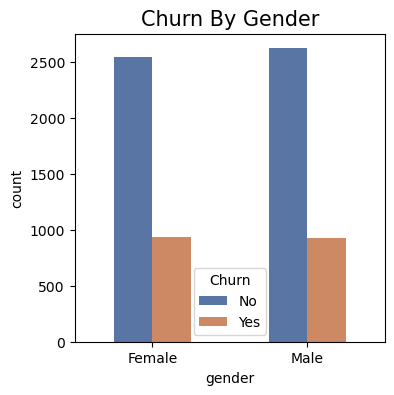

In [68]:
#explore on the basis of gender 
plt.figure(figsize=(4,4))
ax = sns.countplot(x='gender',data=df,hue="Churn",width=0.5,palette='deep')
plt.title("Churn By Gender",fontsize=15)
plt.show()

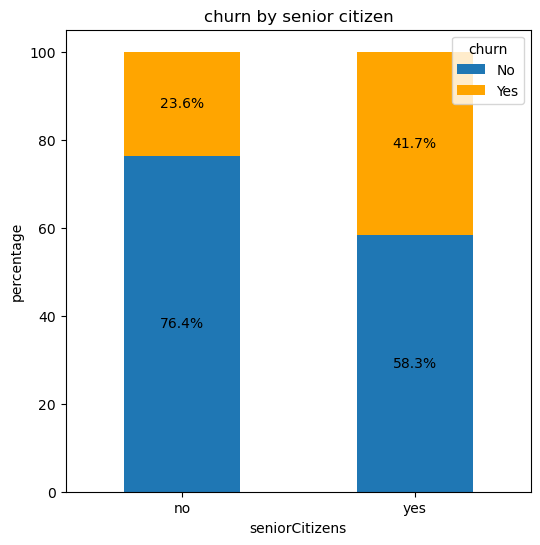

In [15]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
#plot
fig, ax = plt.subplots(figsize=(6,6))
#plot the graph
total_counts.plot(kind='bar',stacked=True,ax=ax,color=['#1f77b4','orange'])
#add percentage labels on the bars
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y =p.get_xy()
    ax.text(x+width /2,y+height /2,f'{height:.1f}%' , ha='center', va='center')

plt.title("churn by senior citizen")
plt.xlabel("seniorCitizens")
plt.ylabel("percentage")
plt.xticks(rotation=0)
plt.legend(title='churn',loc='upper right')
plt.show()

In [ ]:
# Comparative a greatest percentage of people in senior citizens category have churned

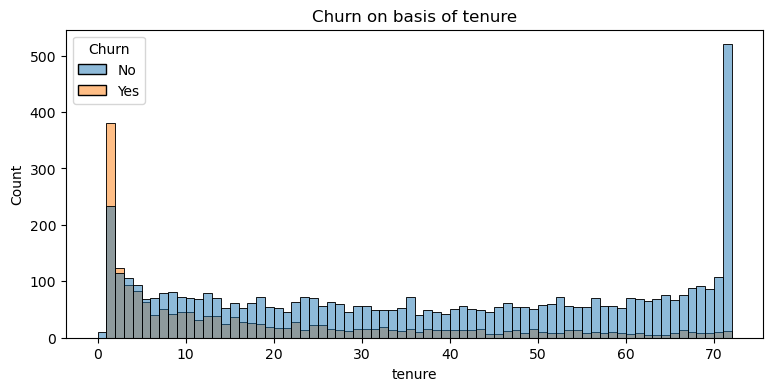

In [39]:
#Churn based on tenure
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,hue='Churn',bins=72)
plt.title("Churn on basis of tenure")
plt.show()

people who have used our services for a long time have stayed and people who have used out services short time (1 or 2 month)they have churned.

In [7]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
# based on Contract

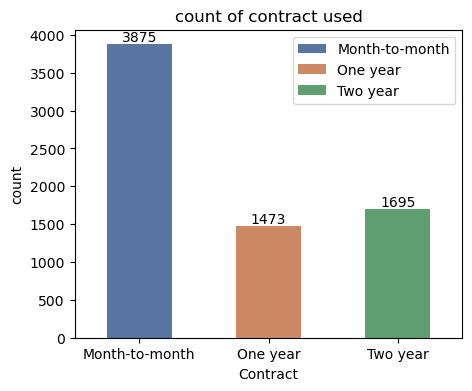

In [41]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Contract',data=df,palette='deep',hue='Contract',width=0.5)
plt.legend(labels=['Month-to-month','One year','Two year'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of contract used")
plt.show()

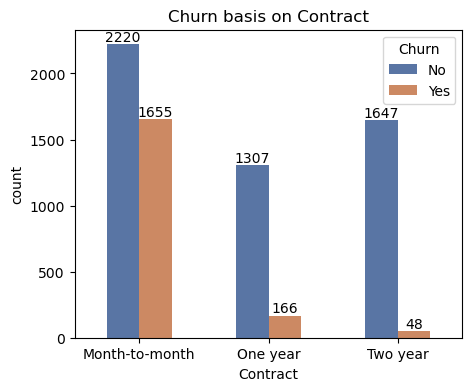

In [42]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Contract',data=df,palette='deep',hue='Churn',width=0.5)
#plt.legend(labels=['Month-to-month','One year','Two year'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Churn basis on Contract")
plt.show()

By above two graphs we can conclude that people refer month-to-month contract for services
and also more people churn out in category of Month-to-month Constract......
on solution on this or to minimize rate of churn we can try prefer one year or two year Constract.....

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

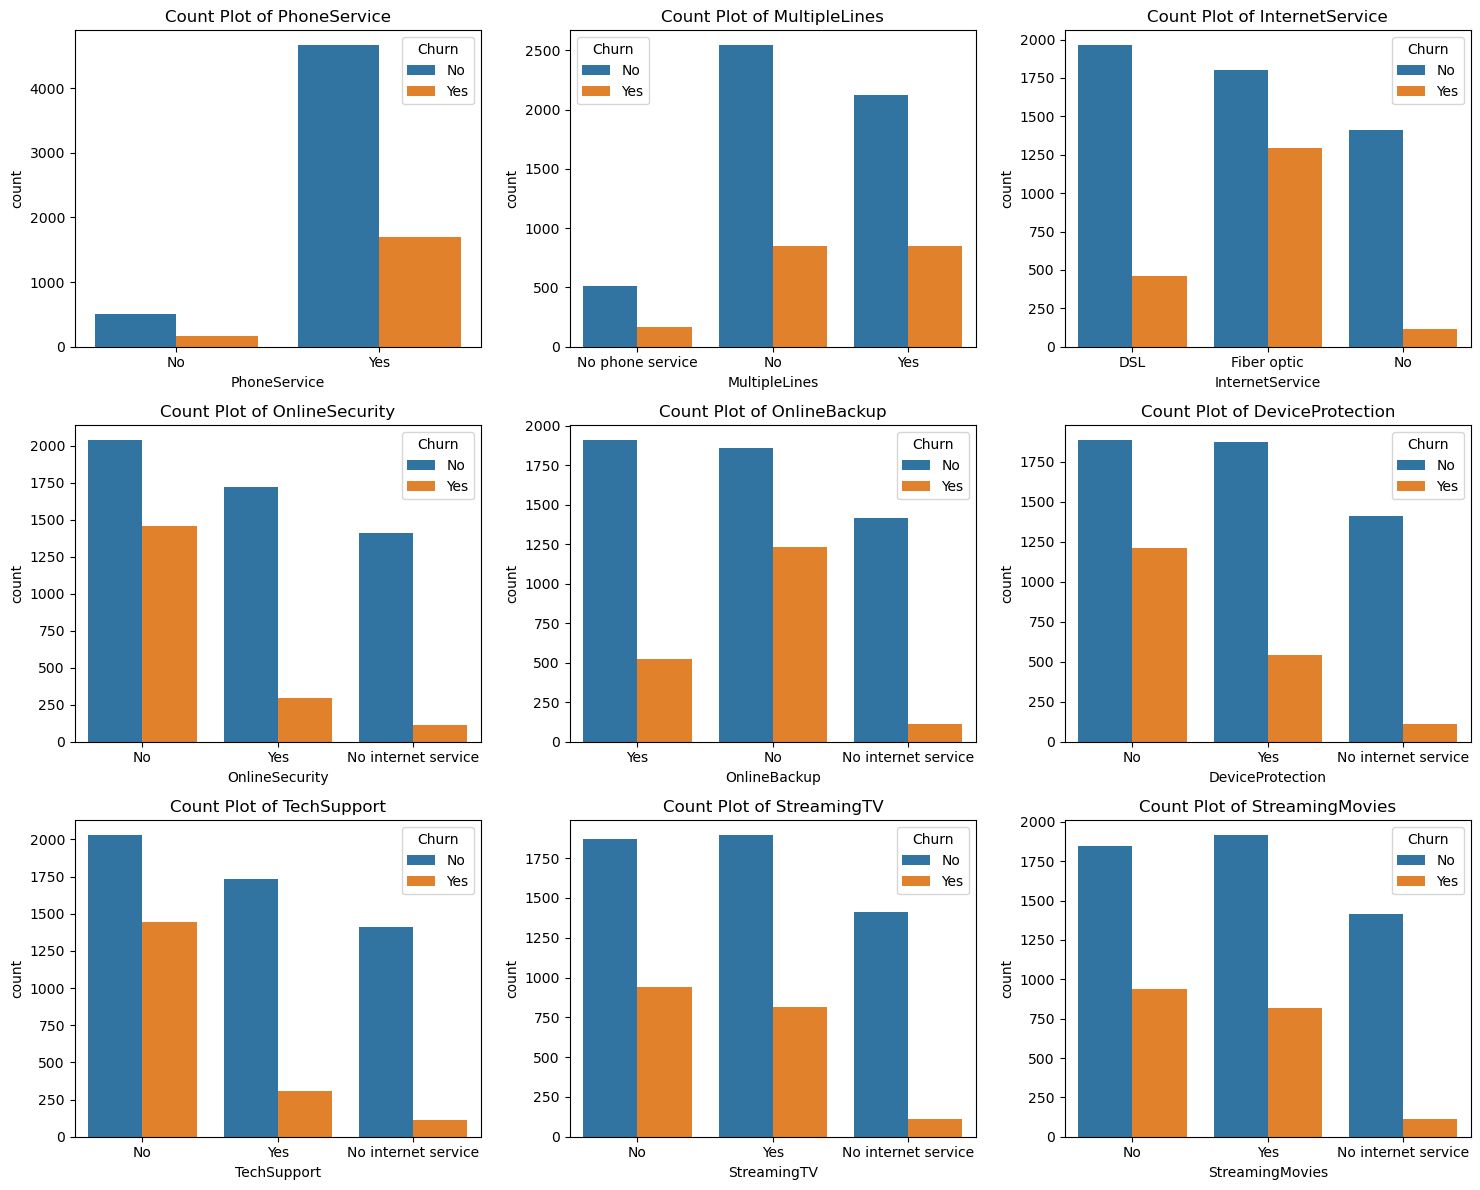

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust the number of rows and columns as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each column and plot a countplot in each subplot
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot of {column}')  # Title for each subplot

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


The majority of customer who not churn tend to have sevices like phoneservices,internetservices and online security enabled.for services like onlineBackup ,techsupport and streaming Tv  churn rate are noticibaly higher when these services are not used or unavaiable.

In [34]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

[]

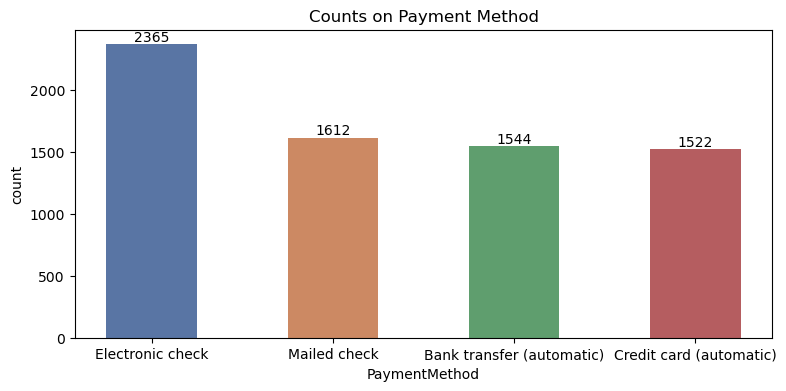

In [52]:
#on the basis of PaymentMethod
plt.figure(figsize=(9,4))
ax=sns.countplot(x='PaymentMethod',data=df,palette='deep',hue='PaymentMethod',width=0.5)
plt.title("Counts on Payment Method")
for bars in ax.containers:
    ax.bar_label(bars)
plt.plot()